<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here") and choose answers in a [web-form](https://docs.google.com/forms/d/16EfhpDGPrREry0gfDQdRPjoiQX9IumaL2mPR0rcj19k/edit).**

In [1]:
import os
os.getcwd()

'c:\\Users\\FeyginAS\\Desktop\\mlcourse.ai-solutions\\jupyter_english\\topic01_pandas_data_analysis'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [3]:
data = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

**First 5 rows**

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [7]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [8]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [9]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [10]:
age_categories = [age_category(age) for age in data.Age]
data["Age_category"] = age_categories

**Another way is to do it with `apply`.**

In [11]:
data["Age_category"] = data["Age"].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men and 577 women
- 479 men and 412 women
- **<font color='green'>577 men and 314 women +</font>**

In [12]:
# You code here
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- **<font color='green'>108 [+]</font>**
- 112
- 125

In [13]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [14]:
# You code here
data.pivot_table(index = ['Pclass'], columns = ['Sex'], values = ['Parch'],  aggfunc = 'count', margins = True)

Parch          
Sex    female male  All
Pclass                 
1          94  122  216
2          76  108  184
3         144  347  491
All       314  577  891

**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- **<font color='green'>median is  14.45, standard deviation is 49.69 +</font>**
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [15]:
# You code here
fare_median = data['Fare'].median()
fare_std = data['Fare'].std()
print(f'median is {fare_median:.2f}, standard deviation is {fare_std:.2f}')

median is 14.45, standard deviation is 49.69


In [16]:
data.describe().loc[['50%', 'std'], ['Fare']]

,Fare
50%,14.45
std,49.69


**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- **<font color='green'>No +</font>**


In [17]:
# You code here
data.groupby(['Survived'])['Age'].mean()

Survived
0    30.63
1    28.34
Name: Age, dtype: float64

In [18]:
import seaborn as sns
sns.set()

c:\Users\FeyginAS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

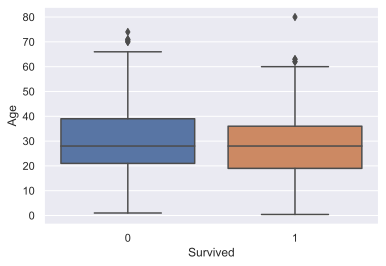

In [19]:
sns.boxplot(data['Survived'], data['Age'])

**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- <font color='green'>40.6% among young and 22.7% among old</font>
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [20]:
# You code here
def age_classificator(age: int) -> str:
        """
        < 30 -> young
        >= 30, <= 60 -> middle aged
        > 60 -> old
        """
        if age < 30:
            return 'young'
        elif age > 60:
            return 'old'
        else:
            return 'other'

result = age_classificator(29)
assert result == "young", f'classification as young expected, got: {result}'
result = age_classificator(30)
assert result == "other", f'classification as other expected, got: {result}'
result = age_classificator(60)
assert result == "other", f'classification as other expected, got: {result}'
result = age_classificator(np.nan)
assert result == "other", f'classification as other expected, got: {result}'
result = age_classificator(61)
assert result == "old", f'classification as old expected, got: {result}'


data['AgeGroup'] = data['Age'].apply(age_classificator)

data.groupby(['AgeGroup'])['Survived'].mean() * 100

AgeGroup
old      22.73
other    37.32
young    40.62
Name: Survived, dtype: float64

**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- **<font color='green'>18.9% among men and 74.2% among women +</font>**

In [21]:
male_survived = data.loc[(data['Sex'] == 'male'), 'Survived']
female_survived = data.loc[(data['Sex'] == 'female'), 'Survived']

print(
    '{}% among men and {}% among women'.format(
        round(male_survived.mean() * 100, 1), round(female_survived.mean() * 100, 1)
    )
)

18.9% among men and 74.2% among women


In [22]:
# You code here
data.groupby('Sex')['Survived'].agg(np.mean) * 100

Sex
female    74.20
male      18.89
Name: Survived, dtype: float64

**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- **<font color='green'>William +</font>
- John

In [23]:
#ФИО пасскажиров хранится в одном столбце. Скопируем в буфер список имен для изучения паттерна ФИО.
data['Name'].drop_duplicates().to_clipboard()

In [24]:
import re
#извлекаем имена из столбца с ФИО
name_pattern = re.compile(r'\.\s+\(?([a-zA-Z]+)', flags = re.IGNORECASE)
passenger_names = data['Name'].str.extract(name_pattern)
#Скопируем в буфер извлеченные имена
passenger_names.to_clipboard()

In [25]:
#посмотрим, какие имена остались
null_names = passenger_names.squeeze().isnull().values
data.loc[null_names, ['Name']].to_clipboard()

In [26]:
# все имена извлеклись
# найдем самое популярное мужское имя
data['FirstName'] = passenger_names
data[data["Sex"] == "male"].groupby(['FirstName'])['FirstName'].count().sort_values(ascending=False)

FirstName
William     35
John        25
George      14
Charles     13
Thomas      13
            ..
Husein       1
Ignjac       1
Iisakki      1
Ilia         1
Yousseff     1
Name: FirstName, Length: 286, dtype: int64

**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40 +
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class +
- On average, passengers ofthe first class are older than those of the 2nd class who are older than passengers of the 3rd class +

In [27]:
# You code here
data.pivot_table(index=['Pclass'], columns=['Sex'], values=['Age'], aggfunc='mean', margins=True)

Age              
Sex    female   male    All
Pclass                     
1       34.61  41.28  38.23
2       28.72  30.74  29.88
3       21.75  26.51  25.14
All     27.92  30.73  29.70

c:\Users\FeyginAS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

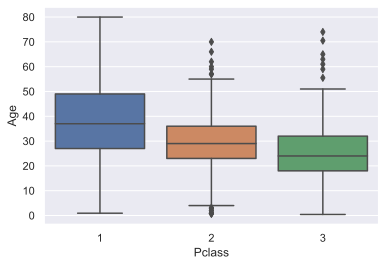

In [28]:
sns.boxplot(data['Pclass'], data['Age'])

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-practice-analyzing-titanic-passengers) with a [solution](https://www.kaggle.com/kashnitsky/topic-1-practice-solution)
* Topic 1 "Exploratory Data Analysis with Pandas" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)